## A Fashion Recommendation System using Image Features leverages computer vision and machine learning techniques to analyze fashion items’ visual aspects (like colour, texture, and style) and recommend similar or complementary products to users.

## Fashion Recommendation Process We Can Follow

Building a fashion recommendation system using image features involves several key steps, leveraging both computer vision and machine learning techniques. Below is a detailed process you can follow to build a fashion recommendation system using image features:

   1. Assemble a diverse dataset of fashion items. This dataset should include a wide variety of items with different colours, patterns, styles, and categories.
   2. Ensure all images are in a consistent format (e.g., JPEG, PNG) and resolution.
   3. Implement a preprocessing function to prepare images for feature extraction.
   4. Choose a pre-trained CNN model such as VGG16, ResNet, or InceptionV3. These models, pre-trained on large datasets like ImageNet, are capable of extracting powerful feature representations from images.
   5. Pass each image through the CNN model to extract features.
   6. Define a metric for measuring the similarity between feature vectors. 
   7. Rank the dataset images based on their similarity to the input image and recommend the top N items that are most similar.
   8. Implement a final function that encapsulates the entire process from pre-processing an input image, extracting features, computing similarities, and outputting recommendations.


# Dataset Description

A fashion recommendation system using image feature extraction is a technology that analyzes the visual content of fashion items (such as clothing, accessories) to recommend similar or complementary products to users.

The provided dataset consists of images of women’s fashion items, including a wide variety of clothing and accessories. Each image represents a unique item, categorized by type (e.g., dresses, tops, skirts), style (e.g., casual, formal, sporty), and other attributes like color and pattern. The images are collected in a uniform format to facilitate the process of feature extraction and analysis.

The primary objective is to develop a fashion recommendation system that can analyze an input fashion item image and recommend similar items from the dataset based on visual similarity. The system should:

    1. Extract Features: Utilize a pre-trained CNN model (e.g., VGG16, ResNet) to extract comprehensive features from each image in the dataset, capturing aspects such as texture, color, and shape.
    2. Measure Similarity: Implement a similarity measure (e.g., cosine similarity) to quantitatively compare the extracted features of the input image against those of the images in the dataset.
    3. Recommend Items: Based on the similarity scores, identify and recommend the top N items that are visually similar to the input item.


In [1]:
# Import the ZipFile class for working with zip archives and os module for file operations
from zipfile import ZipFile
import os

# Define the path to the zip file that you want to extract
zip_file_path = 'women_fashion.zip'

# Define the directory where the contents of the zip file will be extracted
extraction_directory = 'women_fashion/'

# Check if the extraction directory does not exist, create it
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)  # Create the extraction directory

# Open the zip file in read mode
with ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the files into the specified directory
    zip_ref.extractall(extraction_directory)

# List all the files in the extraction directory
extracted_files = os.listdir(extraction_directory)

# Print the first 10 files from the extracted files
print(extracted_files[:10])


['women fashion', '__MACOSX']


In the above code, a zip file named ‘women_fashion.zip’ located at the path: ‘women fashion.zip’ is being extracted to a specified directory: ‘women_fashion/’. Initially, we check if the extraction directory exists, and if it does not, the directory is created using os.makedirs(). Then, using Python’s ZipFile module, the zip file is opened in read mode, and its contents are extracted to the designated directory.

The zip file contains a directory named women fashion and some metadata used by macOS (__MACOSX). Let’s ignore the macOS metadata and focus on the women fashion directory, listing its contents to understand the types and number of images we have:

In [2]:
# Correct the path by joining the original extraction directory and the 'women fashion' subdirectory
# This ensures we are pointing to the right location where the files are extracted
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# List all the files in the updated directory (i.e., 'women fashion' subdirectory)
extracted_files_updated = os.listdir(extraction_directory_updated)

# Display the first 10 files in the updated extraction directory, along with the total count of files
extracted_files_updated[:10], len(extracted_files_updated)


(['pink, knee-length dress that sparkles.jpg',
  'off-the-shoulder black ball gown.jpg',
  'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg',
  'red velvet sheath midi dress.jpg',
  'long, intricately designed dress with full sleeves.jpg',
  'glamorous two-piece outfit featuring a sequined design.jpeg',
  'burgundy off-the-shoulder dress with an asymmetrical hemline.jpg',
  'salwar kameez in a vibrant red color with detailed embroidery.jpg',
  'sparkling, fitted dress with long sleeves.jpg',
  'bright red, sequined dress with thin shoulder straps.jpg'],
 97)

Now, I will look at the first image from the dataset:

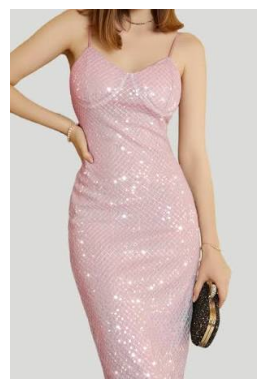

In [3]:
# Import the Image class from the PIL library to work with image files
from PIL import Image
# Import matplotlib's pyplot to display images
import matplotlib.pyplot as plt

# Define a function to load and display an image given its file path
def display_image(file_path):
    # Open the image using PIL's Image class
    image = Image.open(file_path)
    # Use plt.imshow() to display the image in a matplotlib plot
    plt.imshow(image)
    # Turn off the axis labels and ticks for a cleaner display
    plt.axis('off')
    # Show the image plot
    plt.show()

# Specify the path to the first image in the extracted directory
# This helps us inspect the first image to understand its properties or format
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])

# Call the display_image function to load and display the first image
display_image(first_image_path)


Now, I will create a list of all image file paths that will be used later in extracting the features from every image in the dataset:

In [4]:
# Import the glob module for finding files that match a specific pattern
import glob

# Define the directory path where the images are located
# This path should point to the folder containing all the extracted image files
image_directory = '/content/women_fashion/women fashion'

# Use a list comprehension to search for image files in the directory
# glob.glob() retrieves all files matching a pattern (in this case, all files with any extension '*.*')
# The if condition ensures that only files with image extensions (.jpg, .png, .jpeg, .webp) are included
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) 
                    if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# Print the list of image file paths that were found in the directory
print(image_paths_list)


[]


In the above code, the glob module is used to generate a list of file paths for images stored in the directory. The glob.glob function searches for files that match a specified pattern, in this case, *.*, which matches all files within the directory. The list comprehension then filters these files to include only those with specific image file extensions (.jpg, .png, .jpeg, .webp). 

It ensures that image_paths_list contains paths to only the image files, excluding any other file types that might be present in the directory.

Now, I will extract features from all the fashion images:

In [5]:
#!pip install tensorflow
!pip uninstall tensorflow -y
!pip install tensorflow


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)


In [6]:
#!pip install --upgrade numpy tensorflow
!pip install numpy==1.24.3


In [7]:
#!pip list


In [8]:
# Import necessary modules from TensorFlow Keras for loading images and using the VGG16 model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# Load the pre-trained VGG16 model, without the fully connected top layers (for feature extraction)
# 'imagenet' weights are pre-trained on the ImageNet dataset
base_model = VGG16(weights='imagenet', include_top=False)

# Define a new model where the output is taken from the last convolutional layer of the base model
# This creates a feature extractor that returns the output from the convolutional layers
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to preprocess the image for the VGG16 model
def preprocess_image(img_path):
    # Load the image from the file path, resizing it to the input size expected by VGG16 (224x224)
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Convert the loaded image to a NumPy array
    img_array = image.img_to_array(img)
    
    # Expand the image array to add a batch dimension (i.e., convert the array shape from (224, 224, 3) to (1, 224, 224, 3))
    img_array_expanded = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image by normalizing it using VGG16's preprocess_input function (this prepares it for the model)
    return preprocess_input(img_array_expanded)

# Function to extract features from the preprocessed image using the VGG16 model
def extract_features(model, preprocessed_img):
    # Predict the feature map from the preprocessed image using the VGG16 model
    features = model.predict(preprocessed_img)
    
    # Flatten the feature map into a 1D array
    flattened_features = features.flatten()
    
    # Normalize the features by dividing by the L2 norm (length of the vector)
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    
    # Return the normalized feature vector
    return normalized_features

# List to store the extracted feature vectors for all images
all_features = []

# List to store the names of the images
all_image_names = []

# Loop through each image path in the previously created list of image paths
for img_path in image_paths_list:
    # Preprocess the image at the current path
    preprocessed_img = preprocess_image(img_path)
    
    # Extract features from the preprocessed image using the VGG16 model
    features = extract_features(model, preprocessed_img)
    
    # Append the extracted feature vector to the list of features
    all_features.append(features)
    
    # Extract and store the file name (without the directory) of the current image
    all_image_names.append(os.path.basename(img_path))


2024-10-18 01:25:25.486737: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 01:25:25.661088: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 01:25:25.886906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 01:25:25.919503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 01:25:25.930676: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 01:25:25.962092: I tensorflow/core/platform/cpu_feature_gu

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 41s 1us/step


In the above code, a feature extraction process is implemented using the VGG16 model, a popular convolutional neural network pre-trained on the ImageNet dataset, to extract visual features from images stored in image_paths_list.

Initially, the VGG16 model is loaded without its top classification layer (include_top=False), making it suitable for feature extraction rather than classification. Each image path from image_paths_list is processed through a series of steps: the image is loaded and resized to 224×224 pixels to match the VGG16 input size requirements, converted to a NumPy array, and preprocessed to fit the model’s expected input format.

The preprocessed images are then fed into the VGG16 model to extract features, which are subsequently flattened and normalized to create a consistent feature vector for each image. These feature vectors (all_features) and their corresponding image filenames (all_image_names) are stored, providing a structured dataset for the next steps in building a fashion recommendation system using image features.

Now, I’ll write a function to recommend fashion images based on image features:

In [9]:
# Import necessary function to calculate cosine similarity
from scipy.spatial.distance import cosine

# Define the function to recommend fashion items using CNN features
def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    """
    This function recommends similar fashion items based on an input image by comparing feature vectors.
    
    Parameters:
    - input_image_path: Path to the input image for which recommendations are needed.
    - all_features: List of extracted CNN feature vectors for all images.
    - all_image_names: List of image file names corresponding to the feature vectors.
    - model: Pre-trained CNN model (e.g., VGG16) used to extract features.
    - top_n: Number of similar images to recommend (default is 5).
    """
    
    # Pre-process the input image using the function defined earlier
    preprocessed_img = preprocess_image(input_image_path)
    
    # Extract features from the input image using the pre-trained CNN model
    input_features = extract_features(model, preprocessed_img)
    
    # Calculate cosine similarity between the input image's features and all other images' features
    # Cosine similarity formula: 1 - cosine distance
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    
    # Get indices of the top N most similar images, sorted in descending order of similarity
    similar_indices = np.argsort(similarities)[-top_n:]
    
    # Filter out the input image index (if present) from similar_indices
    # Ensures that the input image is not recommended as similar to itself
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # Display the input image in the first subplot
    plt.figure(figsize=(15, 10))  # Create a figure to display images with specified size
    plt.subplot(1, top_n + 1, 1)  # Create a subplot for the input image (1 row, top_n + 1 columns)
    plt.imshow(Image.open(input_image_path))  # Load and display the input image
    plt.title("Input Image")  # Set the title for the input image
    plt.axis('off')  # Turn off axis display for a cleaner look

    # Display the recommended similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        # Construct the path to the recommended image based on the index
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        
        # Create a subplot for each recommended image
        plt.subplot(1, top_n + 1, i + 1)
        
        # Load and display the recommended image
        plt.imshow(Image.open(image_path))
        
        # Set the title for the recommended image, indicating its rank in recommendations
        plt.title(f"Recommendation {i}")
        
        # Turn off axis display for a cleaner look
        plt.axis('off')

    # Adjust layout to ensure proper spacing between subplots
    plt.tight_layout()
    
    # Display the input image and its recommended similar images
    plt.show()


In the above code, we defined a function recommend_fashion_items_cnn, which recommends fashion items similar to a given input image using deep learning-based feature extraction. It utilizes the VGG16 model to extract high-dimensional feature vectors from images, capturing their visual essence.

For a specified input image, the function preprocesses the image, extracts its features, and calculates the cosine similarity between this feature vector and those of other images in the dataset (all_features). It ranks these images based on similarity and selects the top N most similar images to recommend, explicitly excluding the input image from being recommended to itself by filtering out its index from the list of similar indices.

In the end, the function will visualize the input image and its recommendations by displaying them.

Now, here’s how we can use this function to recommend images based on a similar fashion in the input image:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


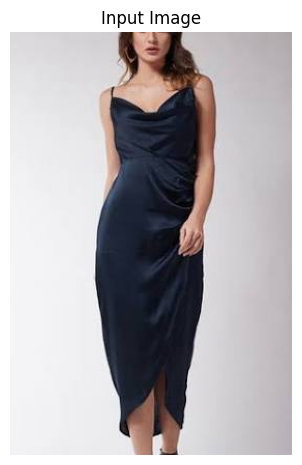

In [13]:
# Set the path to the input image for which recommendations are needed
input_image_path = 'women_fashion/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'

# Call the function to recommend similar fashion items
# Parameters:
# - input_image_path: The path to the input image
# - all_features: List of CNN-extracted features from all images
# - image_paths_list: List of paths to all images
# - model: Pre-trained VGG16 model used for feature extraction
# - top_n=8: Number of similar fashion items to recommend (set to 8 here)
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)


You need to give the path of an image as an input, and you will see similar fashion recommendations as output.